<a href="https://colab.research.google.com/github/SoumyaTeotia/Foundation-of-Data-Science-Assignment/blob/main/a1_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Assignment 1-B Polynomial Regression and Regularization

Problem Statement:

The given dataset is a fish dataset consisting of ~200 data points, each having two
feature variables and one continuous target variable.

| Features    | Target      |
| ----------- | ----------- |
| Width of Fish   | Weight of fish        |
| Height of Fish   

## Task 1: Data Preprocessing
a. Load the shared dataset into a pandas DataFrame.




In [ ]:
data2 = pd.read_csv("Fish Data - A2.csv")

b. Normalize the feature variables by utilizing the formula: X’ = (X - µ) / σ where µ
represents the mean of the feature column, and σ represents the standard
deviation of the feature column.

In [ ]:
for feature in ['Height','Width', 'Weight']:
    mean = data2[feature].mean()
    std = data2[feature].std()
    data2[feature+'_n'] = (data2[feature] - mean) / std

c. Some cells contain NAN / Null Values. Predict the values using the mean of the
existing values of the corresponding feature.

In [ ]:
data2.fillna(data2.mean(), inplace=True)


d. Shuffle the dataset and split the dataset into training and testing sets (80% for
training and 20% for testing).

In [ ]:
data2_shuff = data2.sample(frac=1, random_state=42)  # frac=1 shuffles the entire DataFrame

# Calculate the number of rows for training and testing
rows = data2_shuff.shape[0]
size = int(0.8 * rows)  # 80% for training, 20% for testing

# Split the DataFrame into training and testing sets
train2 = data2_shuff.iloc[:size, :]
test2 = data2_shuff.iloc[size:, :]

# Reset the indices of train2 starting from 1
train2.reset_index(drop=True, inplace=True)

# Reset the indices of test2 starting from 1
test2.reset_index(drop=True, inplace=True)

In [ ]:
X1_train = train2[['Width_n']]
X2_train = train2[['Weight_n']]
Y_train = train2['Height_n']
X1_test = test2[['Width_n']]
X2_test = test2[['Weight_n']]
Y_test = test2['Height_n']

## Task 2: Polynomial Regression
a. Develop nine polynomial regression models (with degrees varying from 0 to 9) to
predict the target variable based on the two input feature variables. Determine the
degree of the polynomial which best fits the given data.

In [ ]:

def polynomial_regression(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha, epochs):
    m_train = len(X1_train)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_train**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_train**i)

    # Stack the features horizontally to create the feature matrix
    X_train_mat = np.column_stack(features)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_test**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_test**i)

    # Stack the features horizontally to create the feature matrix
    X_test_mat = np.column_stack(features)


    w = np.zeros((X_train_mat.shape[1],))
    #print(w)

    train_err_epoch = []  # List to store training error for each epoch
    test_err_epoch = []   # List to store testing error for each epoch

    for _ in range(epochs):
        # Training set predictions and error
        predictions_train = np.dot(X_train_mat, w)
        #print(predictions_train)
        error_train = predictions_train - Y_train
        gradient_train = np.dot(X_train_mat.T, error_train) / m_train
        #print(gradient_train)
        w -= alpha * gradient_train

        # Calculate training error for this epoch and append to the list
        train_err_epoch.append(np.mean(error_train**2))

        # Testing set predictions and error
        predictions_test = np.dot(X_test_mat, w)
        error_test = predictions_test - Y_test

        # Calculate testing error for this epoch and append to the list
        test_err_epoch.append(np.mean(error_test**2))
        #print(w)

    # Final training predictions after all epochs
    Y_train_pred = np.dot(X_train_mat, w)

    # Final testing predictions after all epochs
    Y_test_pred = np.dot(X_test_mat, w)

    # Calculate training and testing RMSE
    train_err = np.mean((Y_train - Y_train_pred)**2)
    test_err = np.mean((Y_test - Y_test_pred)**2)
    #print(w)
    return w, train_err_epoch, test_err_epoch, train_err, test_err


In [ ]:
degrees = list(range(1, 10))
coeff = []
train_err = []
test_err = []
for d in degrees:
    alpha = 0.0000001  # Learning rate
    epochs = 5000  # Number of iterations
    train_err_epoch = []
    test_err_epoch = []
    # Train the model for the current degree
    w, train_err_epoch, test_err_epoch, train_err_curr, test_err_curr = polynomial_regression(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs)
    train_err.append(train_err_curr)
    test_err.append(test_err_curr)

    # Store the coefficients for this degree
    coeff.append(w)

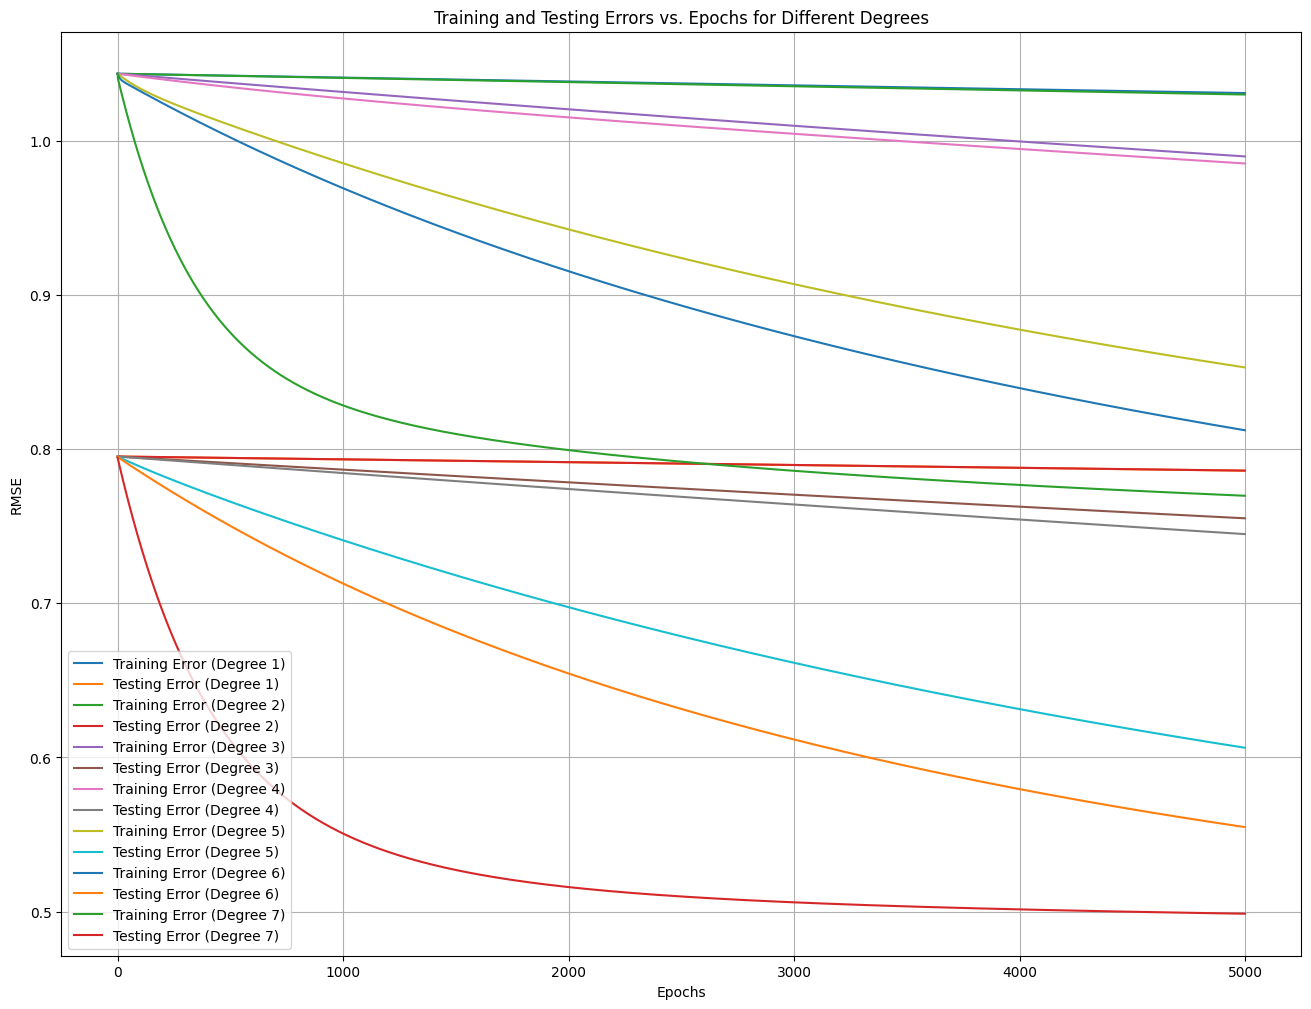

In [ ]:
import matplotlib.pyplot as plt

degrees = list(range(1, 8))
coeff = []
train_err = []
test_err = []

plt.figure(figsize=(16, 12))  # Create the main figure outside the loop

for d in degrees:
    alpha = 0.000001  # Learning rate
    epochs = 5000  # Number of iterations
    train_err_epoch = []
    test_err_epoch = []

    # Train the model for the current degree
    w, train_err_epoch, test_err_epoch, train_err_curr, test_err_curr = polynomial_regression(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha, epochs)

    train_err.append(train_err_curr)
    test_err.append(test_err_curr)

    # Store the coefficients for this degree
    coeff.append(w)

    # Plot the training and testing errors for each degree in the same figure
    plt.plot(range(epochs), train_err_epoch, label=f'Training Error (Degree {d})')
    plt.plot(range(epochs), test_err_epoch, label=f'Testing Error (Degree {d})')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Epochs for Different Degrees')
plt.legend()
plt.grid(True)
plt.show()


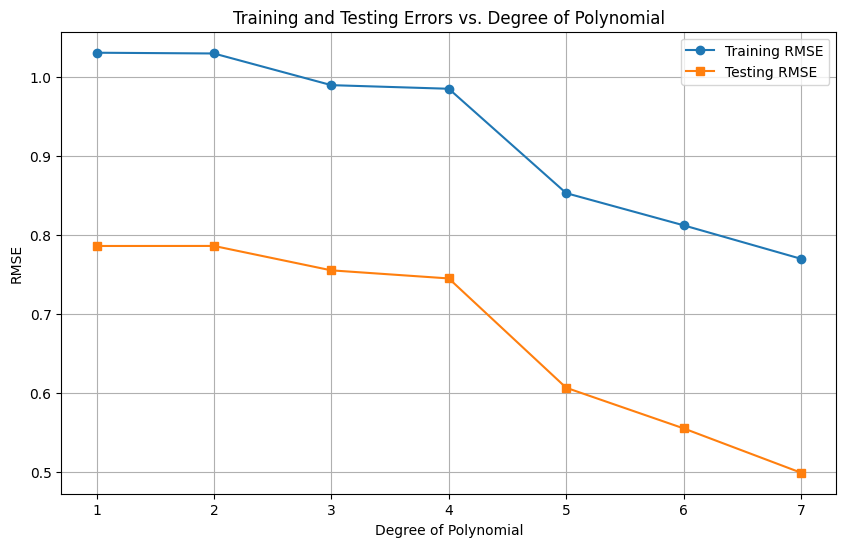

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_err, marker='o', label='Training RMSE')
plt.plot(degrees, test_err, marker='s', label='Testing RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()

b. Build polynomial regression models of best fit degree(obtained from above) with the
following generalized regularized error function:

In [ ]:
import numpy as np

def polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha, epochs, lam, q):
    d = 7
    m_train = len(X1_train)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_train**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_train**i)

    # Stack the features horizontally to create the feature matrix
    X_train_mat = np.column_stack(features)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_test**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_test**i)

    # Stack the features horizontally to create the feature matrix
    X_test_mat = np.column_stack(features)

    w = np.zeros((X_train_mat.shape[1],))
    # print(w)

    train_err_epoch = []  # List to store training error for each epoch
    test_err_epoch = []   # List to store testing error for each epoch

    for _ in range(epochs):
        # Training set predictions and error
        predictions_train = np.dot(X_train_mat, w)
        # print(predictions_train)
        error_train = predictions_train - Y_train
        gradient_train = (np.dot(X_train_mat.T, error_train) + 2 * lam * w) / m_train  # Add regularization term
        # print(gradient_train)
        w -= alpha * gradient_train

        # Calculate training error for this epoch and append to the list
        train_err_epoch.append(np.mean(error_train**2) + lam * np.sum(w**q))  # Add regularization term

        # Testing set predictions and error
        predictions_test = np.dot(X_test_mat, w)
        error_test = predictions_test - Y_test

        # Calculate testing error for this epoch and append to the list
        test_err_epoch.append(np.mean(error_test**2) + lam * np.sum(w**q))  # Add regularization term
        # print(w)

    # print(w)
    return w, train_err_epoch, test_err_epoch


In [ ]:
# nahi mil raha iska

# alpha = 0.000001  # Learning rate
# epochs = 5000  # Number of iterations
# train_err_epoch = []
# test_err_epoch = []
# # Train the model for the current degree
# w, train_err_epoch, test_err_epoch = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs,0.35,0.5)
# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
# plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Training and Testing Errors vs. Epochs for q = 0.5')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# alpha = 0.0000005  # Learning rate
# epochs = 5000  # Number of iterations
# train_err_epoch = []
# test_err_epoch = []
# # Train the model for the current degree
# w, train_err_epoch, test_err_epoch = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs,0.6,1)
# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
# plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Training and Testing Errors vs. Epochs for q = 1')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# alpha = 0.000001  # Learning rate
# epochs = 5000  # Number of iterations
# train_err_epoch = []
# test_err_epoch = []
# # Train the model for the current degree
# w, train_err_epoch, test_err_epoch = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs,0.8,2)
# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
# plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Training and Testing Errors vs. Epochs for q = 2 ')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# alpha = 0.0000005  # Learning rate
# epochs = 5000  # Number of iterations
# train_err_epoch = []
# test_err_epoch = []
# # Train the model for the current degree
# w, train_err_epoch, test_err_epoch = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs,0.8,4)
# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
# plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.title('Training and Testing Errors vs. Epochs fr q =4')
# plt.legend()
# plt.grid(True)
# plt.show()

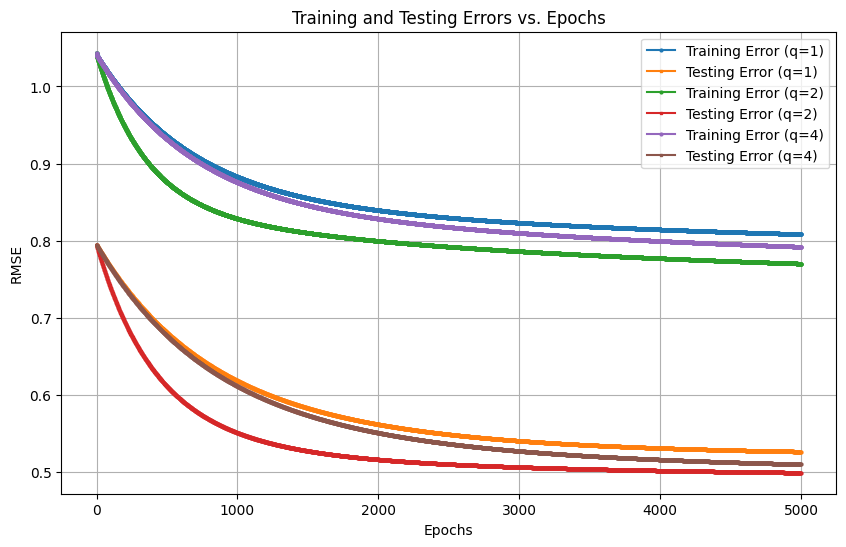

In [ ]:

# Define the hyperparameters and data for each case
alpha_values = [0.0000005, 0.000001, 0.0000005]
epochs = 5000
degrees = [1, 2, 4]
train_err_epochs = []
test_err_epochs = []

# Loop through each case and train the model
for alpha, degree in zip(alpha_values, degrees):
    train_err_epoch = []
    test_err_epoch = []

    w, train_err_epoch, test_err_epoch = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, 7, alpha, epochs, 0.8, degree)

    train_err_epochs.append(train_err_epoch)
    test_err_epochs.append(test_err_epoch)

# Create a single plot for all cases
plt.figure(figsize=(10, 6))

for i, degree in enumerate(degrees):
    plt.plot(range(epochs), train_err_epochs[i], label=f'Training Error (q={degree})', marker='o', markersize=2)
    plt.plot(range(epochs), test_err_epochs[i], label=f'Testing Error (q={degree})', marker='s', markersize=2)

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def polynomial_regression_sgd(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha, epochs, lam, q):
    d = 7
    m_train = len(X1_train)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_train**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_train**i)

    # Stack the features horizontally to create the feature matrix
    X_train_mat = np.column_stack(features)
    features = []

    # Create polynomial features for X1
    for i in range(d + 1):
        features.append(X1_test**i)

    # Create polynomial features for X2
    for i in range(d + 1):
        features.append(X2_test**i)

    # Stack the features horizontally to create the feature matrix
    X_test_mat = np.column_stack(features)

    w = np.zeros((X_train_mat.shape[1],))
    # print(w)

    train_err_epoch = []  # List to store training error for each epoch
    test_err_epoch = []   # List to store testing error for each epoch

    #print(Y_train)
    for epoch in range(epochs):
        # Shuffle the training data for each epoch
        indices = Y_train.index.to_list()
        np.random.shuffle(indices)

        for idx in indices:
            # Training set prediction and error for a single data point
            prediction = np.dot(X_train_mat[idx], w)
            #print(prediction)
            error = prediction - Y_train[idx]

            # Compute the gradient for this data point
            gradient = (X_train_mat[idx] * error + 2 * lam * w)

            # Update the weights using the stochastic gradient
            w -= alpha * gradient

        # Calculate training error for this epoch and append to the list
        predictions_train = np.dot(X_train_mat, w)
        error_train = predictions_train - Y_train
        train_err_epoch.append(np.mean(error_train**2) + lam * np.sum(w**q))

        # Testing set predictions and error
        predictions_test = np.dot(X_test_mat, w)
        error_test = predictions_test - Y_test

        # Calculate testing error for this epoch and append to the list
        test_err_epoch.append(np.mean(error_test**2) + lam * np.sum(w**q))
        # print(w)

    # print(w)
    return w, train_err_epoch, test_err_epoch


1. Build different regression models by taking q as 0.5,1,2,4.

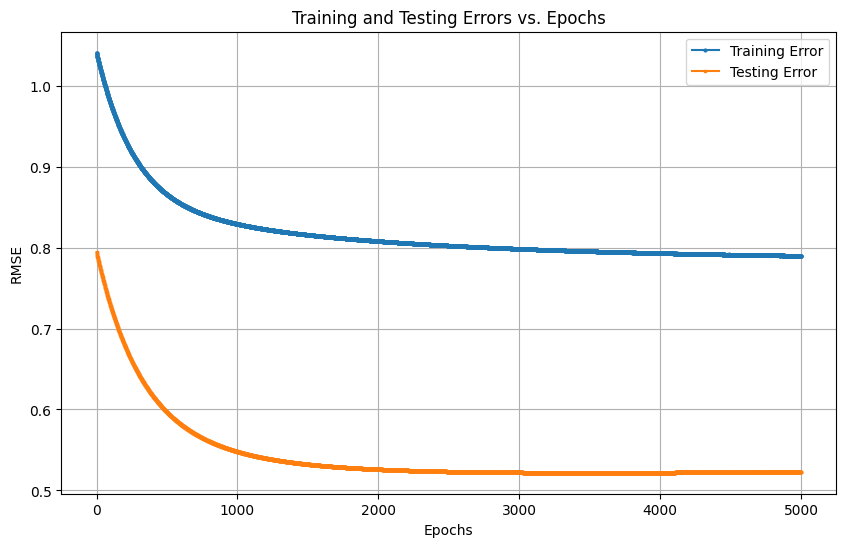

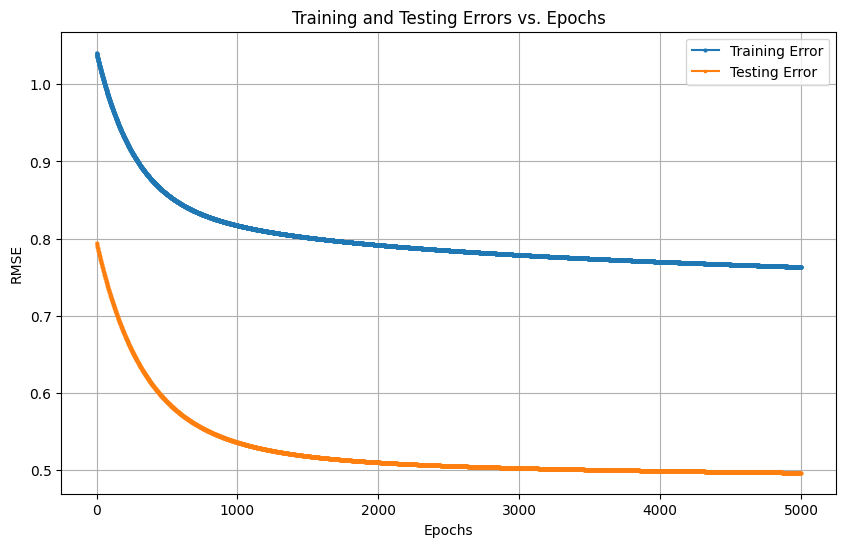

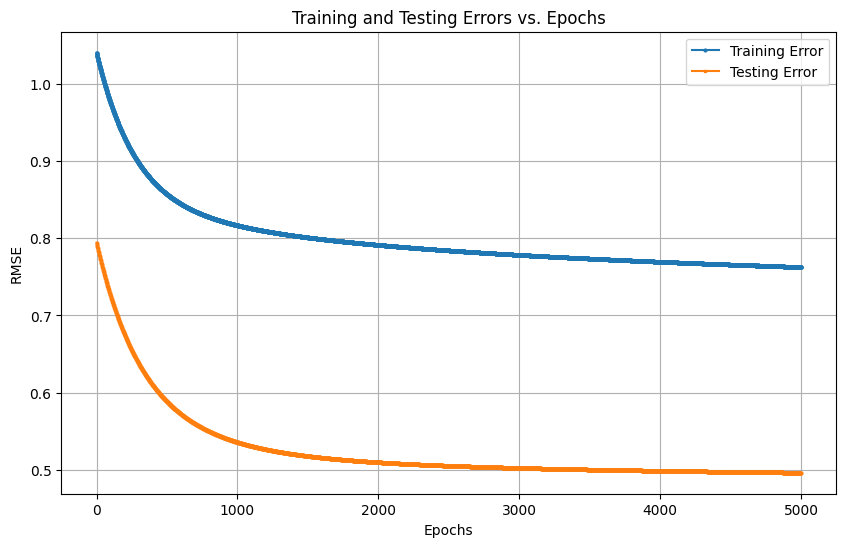

In [ ]:

# Define the hyperparameters and data for each case
q_val = [1, 2, 4]
train_err_epochs = []
test_err_epochs = []

# Loop through each case and train the model
for q in q_val:
    train_err_epoch = []
    test_err_epoch = []

    w, train_err_epoch, test_err_epoch = polynomial_regression_sgd(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, 7, 0.00000001, 5000, 0.8, q)
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
    plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('Training and Testing Errors vs. Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    train_err_epochs.append(train_err_epoch)
    test_err_epochs.append(test_err_epoch)




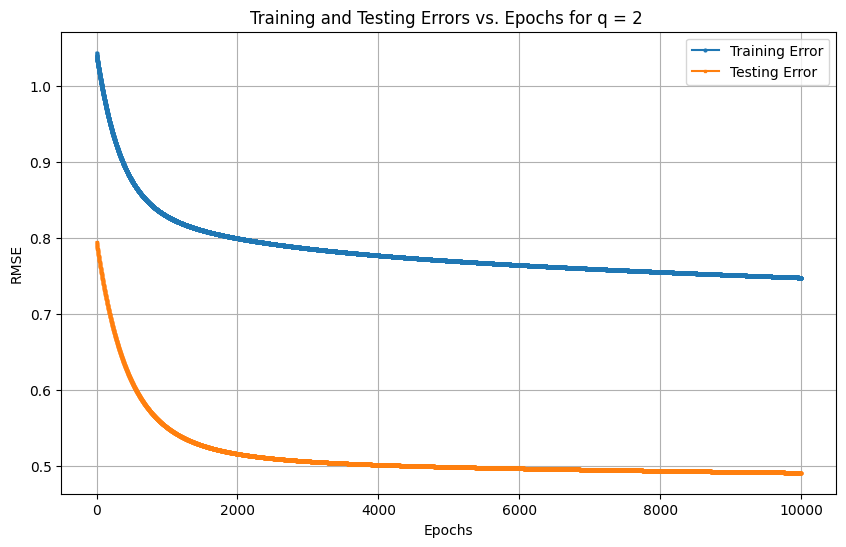

In [ ]:
#final for gradient:
alpha = 0.000001  # Learning rate
epochs = 10000  # Number of iterations
train_err_epoch_g = []
test_err_epoch_g = []
# Train the model for the current degree
w_g, train_err_epoch_g, test_err_epoch_g = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test,X2_test, Y_test, d, alpha, epochs,0.8,2)
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_err_epoch_g, label='Training Error', marker='o', markersize=2)
plt.plot(range(epochs), test_err_epoch_g, label='Testing Error', marker='s', markersize=2)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Epochs for q = 2 ')
plt.legend()
plt.grid(True)
plt.show()

Determining best model using stochastic gradient descent

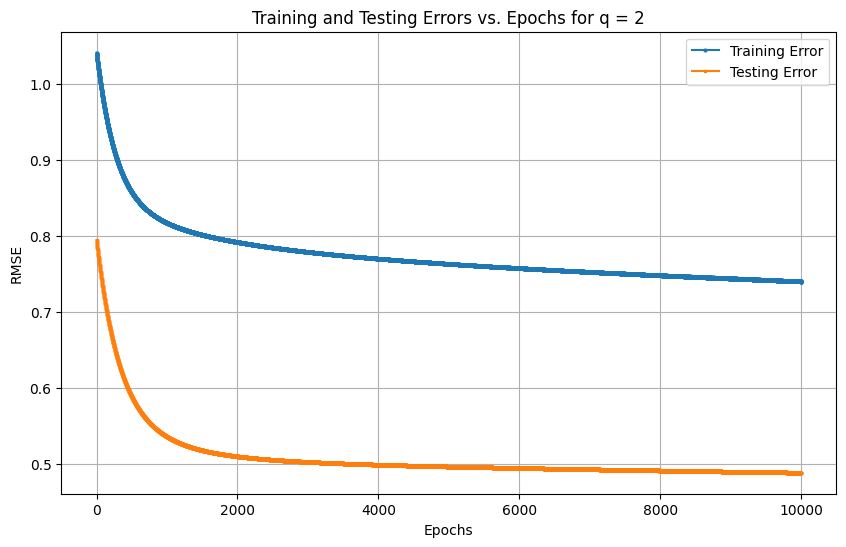

In [ ]:
#final for stochastic
alpha = 0.00000001  # Learning rate
epochs = 10000  # Number of iterations
train_err_epoch_s = []
test_err_epoch_s = []
# Train the model for the current degree
w_s, train_err_epoch_s, test_err_epoch_s = polynomial_regression_sgd(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha, epochs, 0.8, 2)
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_err_epoch_s, label='Training Error', marker='o', markersize=2)
plt.plot(range(epochs), test_err_epoch_s, label='Testing Error', marker='s', markersize=2)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Epochs for q = 2')
plt.legend()
plt.grid(True)
plt.show()

Determining best model using batch gradient descent:

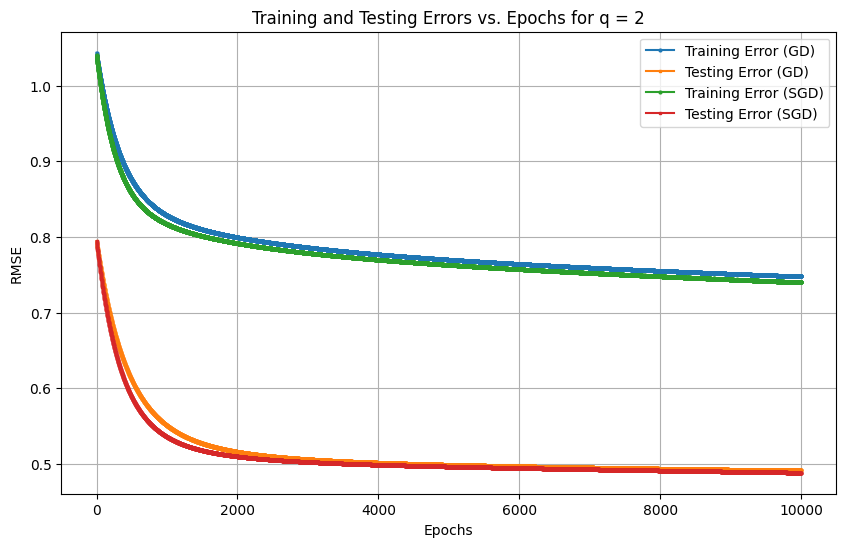

In [ ]:

# Gradient Descent
alpha_g = 0.000001  # Learning rate for gradient descent
epochs_g = 10000  # Number of iterations for gradient descent
train_err_epoch_g = []
test_err_epoch_g = []

# Stochastic Gradient Descent
alpha_s = 0.00000001  # Learning rate for stochastic gradient descent
epochs_s = 10000  # Number of iterations for stochastic gradient descent
train_err_epoch_s = []
test_err_epoch_s = []

# Train the model for q = 2 using both GD and SGD
w_g, train_err_epoch_g, test_err_epoch_g = polynomial_regression_reg(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha_g, epochs_g, 0.8, 2)
w_s, train_err_epoch_s, test_err_epoch_s = polynomial_regression_sgd(X1_train, X2_train, Y_train, X1_test, X2_test, Y_test, d, alpha_s, epochs_s, 0.8, 2)

# Create a single plot for both GD and SGD
plt.figure(figsize=(10, 6))

plt.plot(range(epochs_g), train_err_epoch_g, label='Training Error (GD)', marker='o', markersize=2)
plt.plot(range(epochs_g), test_err_epoch_g, label='Testing Error (GD)', marker='s', markersize=2)

plt.plot(range(epochs_s), train_err_epoch_s, label='Training Error (SGD)', marker='o', markersize=2)
plt.plot(range(epochs_s), test_err_epoch_s, label='Testing Error (SGD)', marker='s', markersize=2)

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Epochs for q = 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
features = []
d=7
# Create polynomial features for X1
for i in range(d + 1):
    features.append(X1_train**i)

# Create polynomial features for X2
for i in range(d + 1):
    features.append(X2_train**i)

# Stack the features horizontally to create the feature matrix
X_train_mat = np.column_stack(features)

Y_pred = np.dot(X_train_mat, w_s)


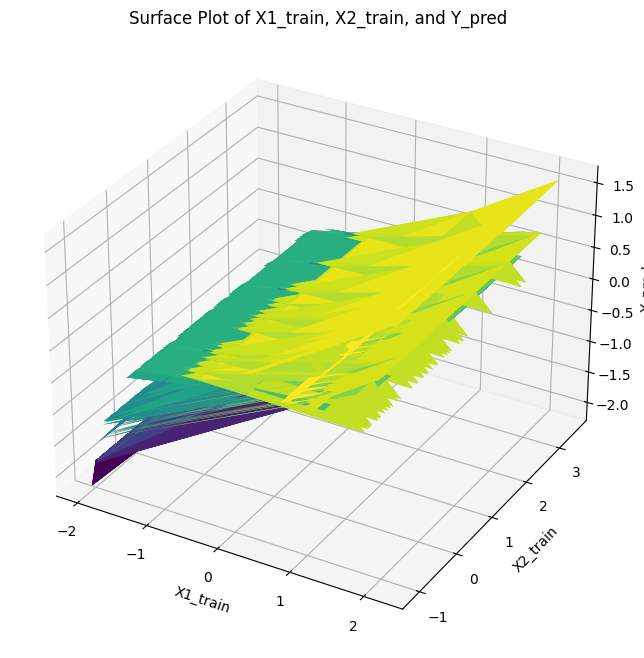

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X1_train_grid, X2_train_grid = np.meshgrid(X1_train, X2_train)
Y_pred_grid = np.ones_like(X1_train_grid) * Y_pred
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1_train_grid, X2_train_grid, Y_pred_grid, cmap='viridis')
ax.set_xlabel('X1_train')
ax.set_ylabel('X2_train')
ax.set_zlabel('Y_pred')
ax.set_title('Surface Plot of X1_train, X2_train, and Y_pred')

plt.show()
